In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


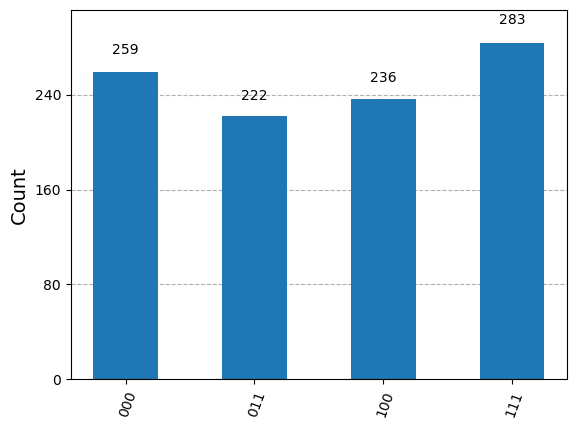


Quantum Enigma Results:
------------------------
State 111: 250418 times
  Guardian lying: q1
  q1 guardian points to: Left door
  q0 guardian points to: Left door
  Treasure is behind: Right door
  ---
State 011: 250609 times
  Guardian lying: q0
  q1 guardian points to: Left door
  q0 guardian points to: Left door
  Treasure is behind: Right door
  ---
State 000: 249898 times
  Guardian lying: q0
  q1 guardian points to: Right door
  q0 guardian points to: Right door
  Treasure is behind: Left door
  ---
State 100: 249075 times
  Guardian lying: q1
  q1 guardian points to: Right door
  q0 guardian points to: Right door
  Treasure is behind: Left door
  ---

Circuit Metrics:
---------------
depth: 14
width: 6
size: 17
count_ops: OrderedDict([('x', 6), ('cx', 5), ('barrier', 3), ('measure', 3), ('h', 2), ('swap', 1)])
num_qubits: 3
num_clbits: 3
num_ancillas: 0
num_parameters: 0
has_calibrations: False
has_layout: False

Success Analysis:
----------------
Mean success rate: 100.00%
St

,Metric,Value
0,gate_count,17.000
1,circuit_depth,14.000
2,t_count,0.000
3,cnot_count,5.000
4,two_qubit_count,6.000
5,multi_qubit_ratio,0.176



Entanglement Metrics:


,Metric,Value
0,entangling_gate_density,0.353
1,entangling_width,3.000



Standardized Metrics:


,Metric,Value
0,circuit_volume,42.000
1,gate_density,0.405
2,clifford_ratio,0.765
3,non_clifford_ratio,-0.118



Advanced Circuit Metrics:


,Metric,Value
0,parallelism_factor,1.214
1,parallelism_efficiency,0.405
2,circuit_efficiency,0.405
3,quantum_resource_utilization,0.988



Derived Complexity Metrics:


,Metric,Value
0,square_ratio,0.214
1,weighted_complexity,100.000
2,normalized_weighted_complexity,33.333



Quantum Volume Estimates:


,Metric,Value
0,Standard Quantum Volume,8.00
1,Enhanced Quantum Volume,11.22



Factors affecting Quantum Volume:


,Factor,Value
0,square_ratio,0.43
1,circuit_density,0.20
2,multi_qubit_ratio,0.35
3,connectivity_factor,1.00
4,enhancement_factor,0.40



Complexity metrics saved to 'enigma_complexity_metrics.csv'

Circuit:


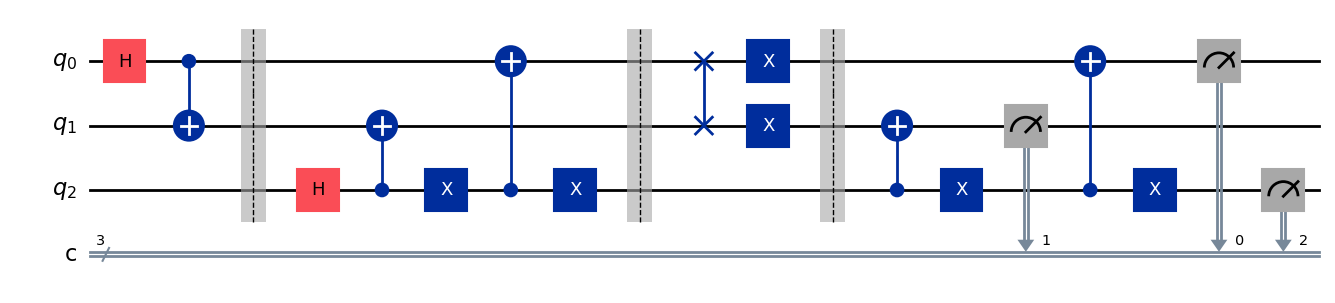

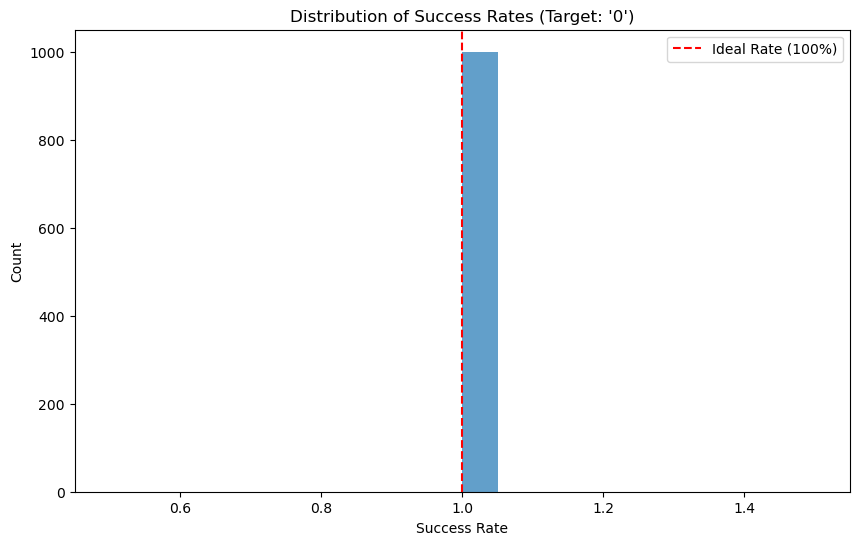

In [4]:
from qiskit_qward.examples.two_doors_enigma.run import run

# Run the quantum enigma
scanner = run()
print("\nCircuit:")
scanner.draw()

# qiskit

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

## Setup guardians

In [11]:
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
simulator = AerSimulator()

In [12]:
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

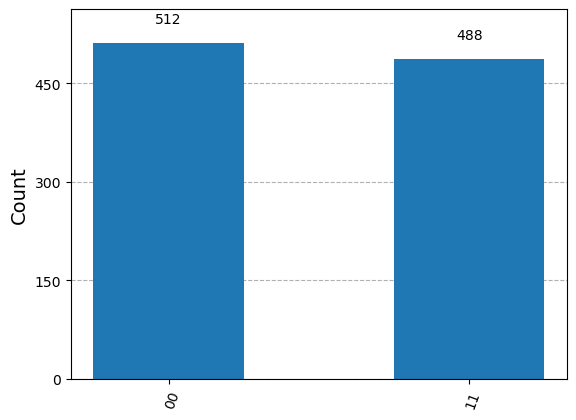

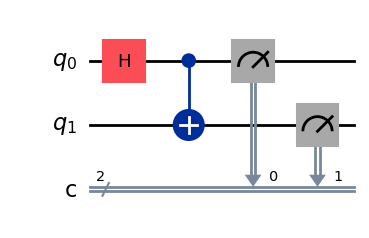

In [13]:
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
display(plot_histogram(counts))
qc.draw(output="mpl")
# 0 is right, 1 is left

## Setup Lie detector

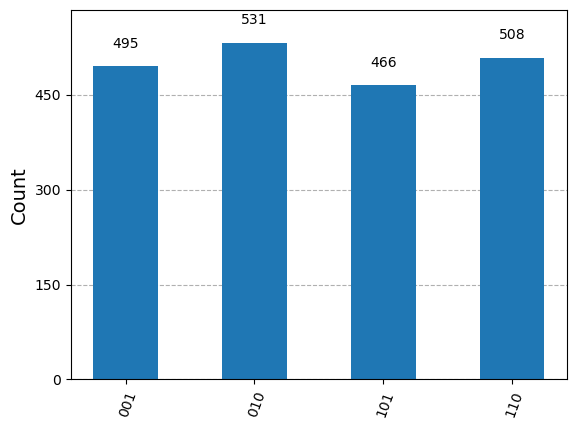

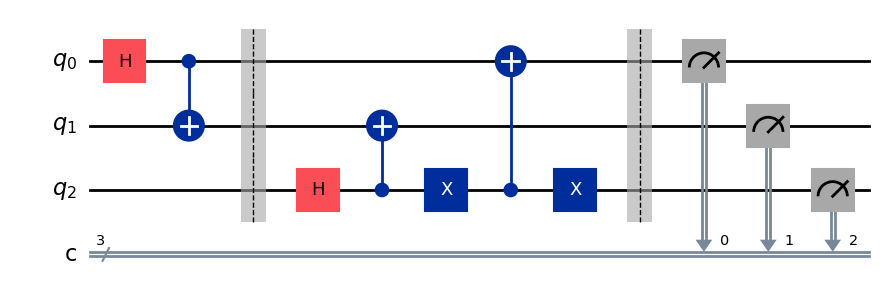

In [14]:
# 0 is right, 1 is left

# q2: Which guardian is lying (0=right, 1=left)
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)

# guardians
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# detector
qc.h(2)
qc.cx(2, 1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)
qc.barrier()
qc.measure([0, 1, 2], [0, 1, 2])

simulator = AerSimulator()
result = simulator.run(qc, shots=2000).result()
counts = result.get_counts()
display(plot_histogram(counts))
qc.draw(output="mpl")

In [15]:
counts

{'001': 495, '101': 466, '110': 508, '010': 531}

| State | Lie Detector (q2) | Left Guardian (q1) | Right Guardian (q0) | Interpretation |
|-------|------------------|-------------------|-------------------|----------------|
| 101 | 1 (Left lying) | 0 (Right) | 1 (Left) | Right points to left, Left points to right, Left guardian is lying |
| 110 | 0 (Right lying) | 1 (Left) | 1 (Left) | Both point to left door, Right guardian is lying |
| 001 | 1 (Left lying) | 0 (Right) | 0 (Right) | Both point to right door, Left guardian is lying |
| 010 | 0 (Right lying) | 1 (Left) | 0 (Right) | Right points to right, Left points to left, Right guardian is lying |

# question setup

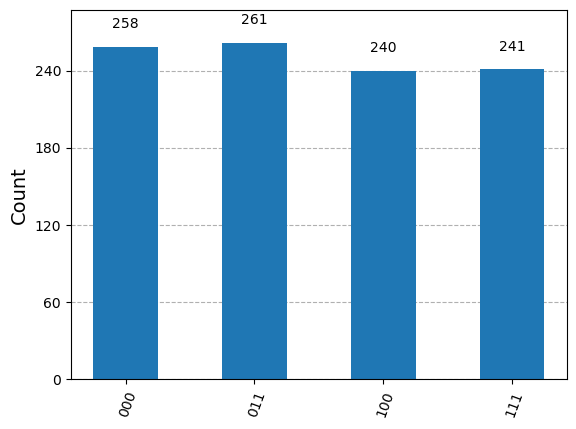

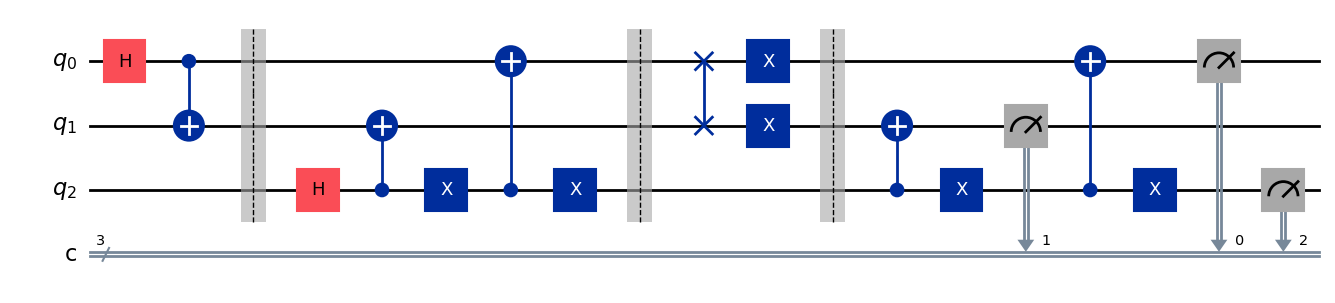

In [16]:
# which door would the other guarding tell me not to open?

# 0 is right, 1 is left

# q2: Which guardian is lying (0=right, 1=left)
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)

# guardians
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# detector
qc.h(2)

# detect lier
qc.cx(2, 1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)

qc.barrier()

# question setup

# Apply the "what would the other guardian say" logic
# First, swap the guardians' knowledge
qc.swap(0, 1)  # Swap right and left guardian knowledge

# Apply NOT gates to represent "not to open"
qc.x(0)  # NOT on right guardian's answer
qc.x(1)  # NOT on left guardian's answer
qc.barrier()

# detect lier
qc.cx(2, 1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)

qc.measure([0, 1, 2], [0, 1, 2])

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
display(plot_histogram(counts))
qc.draw(output="mpl")